# Classification CAH

In this notebook, the data with 100000 flights is used to conduct the classification.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import ward, fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.ensemble import GradientBoostingClassifier
from pretreatment import *
from cluster import *

In [2]:
database_name = '../data/descriptors.db'

columns_dropped = ['icao', 'icao_airline', 'duration_cruise', 'airport_climb', 'airport_descent']

df, df_meteo, df_operation, airlines_decoder = pretreatment(database_name, columns_dropped, threshold_nb_flights=100, drop_min_max=True)
columns = df.columns
mad, clf, accuracy, X_train, X_test, y_train, y_test = feature_selection_baseline(df, n_estimators=100)
columns_remained = feature_selection(mad, clf, accuracy, X_train, X_test, y_train, y_test, columns, begin=-3, end=3, n_choices=10)

number of evaluation is 1
number of evaluation is 2
number of evaluation is 3
number of evaluation is 4
number of evaluation is 5


In [3]:
columns_meteo = df_meteo.columns
mad, clf, accuracy, X_train, X_test, y_train, y_test = feature_selection_baseline(df_meteo, n_estimators=100)
columns_remained_meteo = feature_selection(mad, clf, accuracy, X_train, X_test, y_train, y_test, columns_meteo, begin=-3, end=3, n_choices=10)

number of evaluation is 1


In [4]:
columns_operation = df_operation.columns
mad, clf, accuracy, X_train, X_test, y_train, y_test = feature_selection_baseline(df_operation, n_estimators=100)
columns_remained_operation = feature_selection(mad, clf, accuracy, X_train, X_test, y_train, y_test, columns_operation, begin=-3, end=3, n_choices=10)

number of evaluation is 1
number of evaluation is 2
number of evaluation is 3


In [5]:
print(f'Columns deleted for whole dataset: {columns_deleted(columns, columns_remained)}')
print(f'Columns deleted for meteo sub dataset: {columns_deleted(columns_meteo, columns_remained_meteo)}')
print(f'Columns deleted for operation sub dataset: {columns_deleted(columns_operation, columns_remained_operation)}')

Columns deleted for whole dataset: ['std_speed_descent', 'avg_vertrate_speed_cruise', 'wind_speed_kt_climb', 'std_altitude_cruise', 'wind_speed_kt_descent', 'std_vertrate_speed_cruise', 'avg_speed_descent', 'duration_climb']
Columns deleted for meteo sub dataset: ['wind_speed_kt_descent', 'wind_speed_kt_climb']
Columns deleted for operation sub dataset: ['avg_vertrate_speed_cruise', 'std_altitude_cruise', 'duration_climb']


# Aggregating data

In [6]:
df_airlines = to_airlines(df, columns_remained)
df_airlines_meteo = to_airlines(df_meteo, columns_remained_meteo)
df_airlines_operation = to_airlines(df_operation, columns_remained_operation)

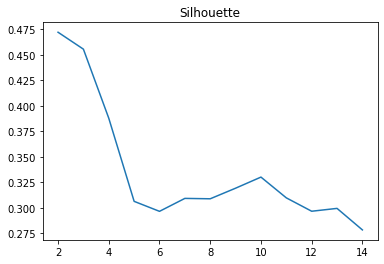

Optimal group numbers for whole dataset: 2


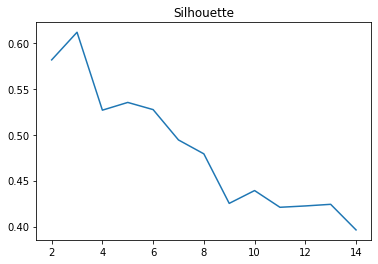

Optimal group numbers for meteo dataset: 3


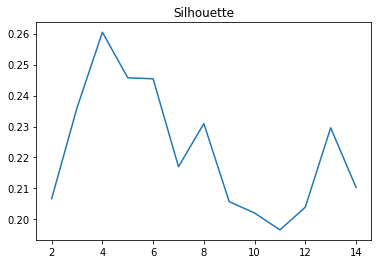

Optimal group numbers for operation dataset: 4


In [7]:
print(f'Optimal group numbers for whole dataset: {optimal_group_numbers(df_airlines, plot=True)}')
print(f'Optimal group numbers for meteo dataset: {optimal_group_numbers(df_airlines_meteo, plot=True)}')
print(f'Optimal group numbers for operation dataset: {optimal_group_numbers(df_airlines_operation, plot=True)}')

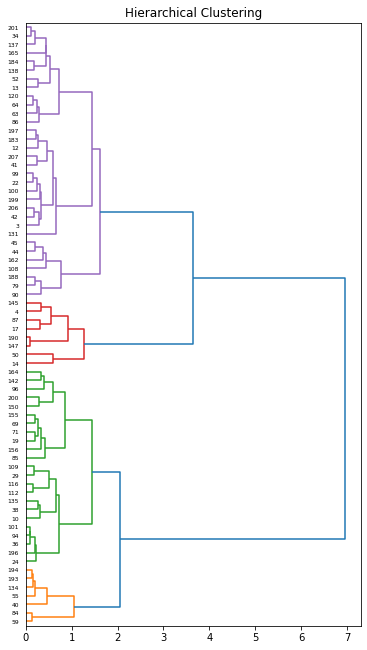

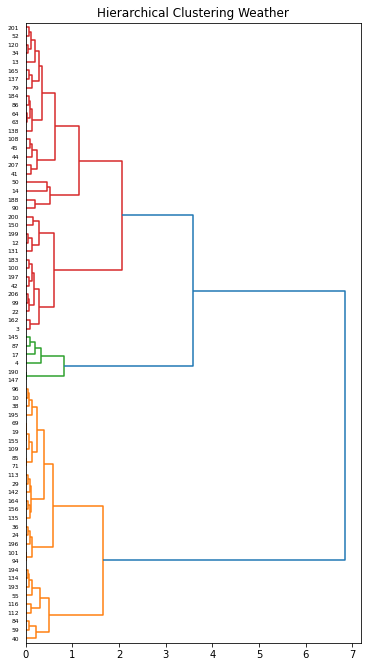

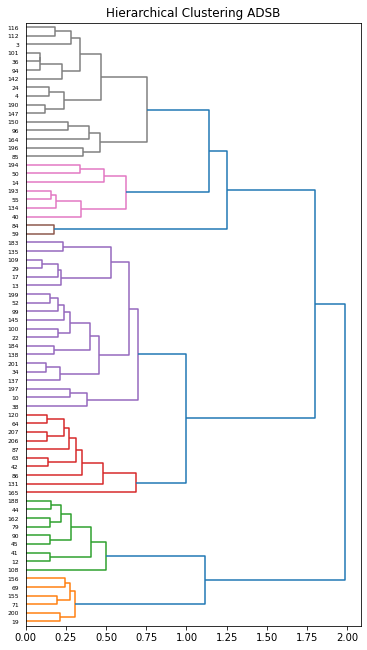

In [8]:
groups_cah = cah(df_airlines, "Hierarchical Clustering", "../classification_result/cah.png", threshold = 2)
groups_cah_meteo = cah(df_airlines_meteo, "Hierarchical Clustering Weather", "../classification_result/cah_meteo.png", threshold = 3)
groups_cah_operation = cah(df_airlines_operation, "Hierarchical Clustering ADSB", "../classification_result/cah_operation.png", threshold = 0.8)

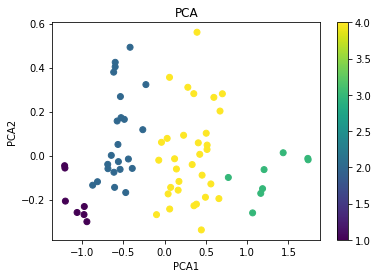

In [9]:
pca_plot_clustering(df_airlines, groups_cah, "PCA", "../classification_result/pca.png")


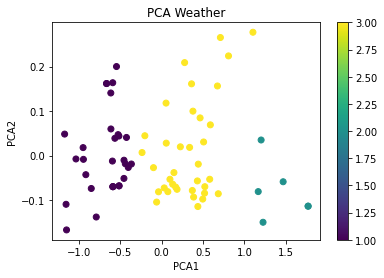

In [10]:
pca_plot_clustering(df_airlines_meteo, groups_cah_meteo, "PCA Weather", "../classification_result/pca_meteo.png")


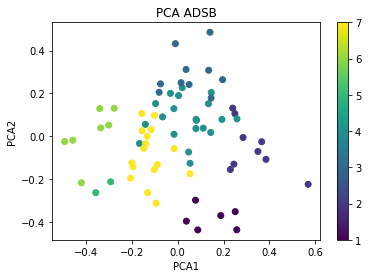

In [11]:
pca_plot_clustering(df_airlines_operation, groups_cah_operation, "PCA ADSB", "../classification_result/pca_operation.png")

In [12]:
group_descriptors(df_airlines, groups_cah)

,dewpoint_c_climb,dewpoint_c_descent,temp_c_climb,temp_c_descent,duration_descent,std_speed_cruise,std_speed_climb,std_vertrate_speed_descent,std_vertrate_speed_climb,avg_vertrate_speed_descent,avg_vertrate_speed_climb,mean_altitude_cruise,avg_speed_climb,avg_speed_cruise
group,,,,,,,,,,,,,,
1,21.7,19.40,28.0,27.0,1250.00,1.351300,48.876922,3.469006,3.835429,-6.958657,8.953654,10972.461333,189.530000,235.746410
2,14.0,14.00,21.0,21.0,1670.00,2.711980,39.993832,3.308408,4.045545,-6.279754,8.447656,10367.636033,196.131869,231.731976
3,-11.0,-8.75,-4.0,-5.0,1634.50,2.804788,45.589540,3.304762,3.912773,-6.407472,8.967112,10971.564223,190.085806,229.396783
4,2.5,2.50,9.5,10.0,1543.25,3.404062,43.454160,3.845651,4.376518,-7.032136,9.461771,11199.746663,190.009629,226.703250


In [13]:
group_descriptors(df_airlines_meteo, groups_cah_meteo)

,dewpoint_c_climb,dewpoint_c_descent,temp_c_climb,temp_c_descent
group,,,,
1,15.0,14.0,22.0,22.5
2,-11.0,-9.5,-6.5,-6.5
3,2.5,2.5,9.5,10.0


In [14]:
group_descriptors(df_airlines_operation, groups_cah_operation)

,std_speed_cruise,duration_descent,std_vertrate_speed_descent,avg_speed_descent,std_speed_climb,std_vertrate_speed_cruise,avg_vertrate_speed_descent,std_speed_descent,avg_vertrate_speed_climb,std_vertrate_speed_climb,mean_altitude_cruise,avg_speed_climb,avg_speed_cruise
group,,,,,,,,,,,,,
1,5.609456,1740.00,2.423377,149.754046,38.403129,0.196544,-5.248532,51.169763,8.481220,4.181669,9785.386955,182.918885,244.175627
2,5.991034,1720.00,3.831230,164.491662,41.429617,0.233749,-6.896681,53.964040,8.586984,4.144348,11130.330798,196.370000,232.397124
3,2.681856,1505.00,4.159068,162.121665,43.783208,0.253202,-7.746593,52.766609,10.923297,4.759562,11319.705525,183.784771,224.516224
4,3.007854,1540.50,3.536656,162.216919,45.867008,0.242294,-7.055747,50.984050,9.166773,4.095533,10972.538433,193.417003,226.703250
5,2.105217,817.25,2.145956,107.341344,31.270789,0.191925,-5.192040,35.798706,9.382892,3.747670,10973.059033,182.504719,236.711280
6,1.351300,1309.00,3.621442,161.692973,51.205007,0.155532,-6.958657,50.431853,8.953654,3.835429,10666.511218,190.607736,235.746410
7,2.108501,1704.50,3.273040,152.423683,40.153676,0.186670,-6.343872,52.952454,8.346108,4.009502,10968.651015,194.012564,229.876607


In [48]:
classification = airlines_group(df_airlines, groups_cah, airlines_decoder)
classification.reset_index(inplace=True)
classification.rename(columns={'index': 'group'}, inplace=True)

In [49]:
classification

,group,airline_cat,airline
0,1,194,Vietnam Airlines
1,1,55,Avianca
2,1,134,Pacific Airlines
3,1,40,"Aires, AerovÃ­as de IntegraciÃ³n Regional, S.A."
4,1,59,Batik Air
...,...,...,...
65,4,100,Iberia Express
66,4,108,JetBlue Airways
67,4,120,Lufthansa
68,4,137,Peach Aviation


In [55]:
classification_meteo = airlines_group(df_airlines_meteo, groups_cah_meteo, airlines_decoder)
classification_meteo.reset_index(inplace=True)
classification_meteo.rename(columns={'index': 'group_meteo'}, inplace=True)

In [56]:
classification_meteo

,group_meteo,airline_cat,airline
0,1,101,IndiGo Airlines
1,1,84,Escuela De Pilotos Are AviaciÃ³n
2,1,164,Spring Airlines
3,1,71,China Southern Airlines
4,1,69,China Eastern Airlines
...,...,...,...
67,3,100,Iberia Express
68,3,108,JetBlue Airways
69,3,120,Lufthansa
70,3,52,Austrian Airlines


In [57]:
classification_operation = airlines_group(df_airlines_operation, groups_cah_operation, airlines_decoder)
classification_operation.reset_index(inplace = True)
classification_operation.rename(columns={'index': 'group_operation'}, inplace=True)
classification_operation

,group_operation,airline_cat,airline
0,1,156,Sichuan Airlines
1,1,155,Shenzhen Airlines
2,1,69,China Eastern Airlines
3,1,19,Air China
4,1,200,West Air (China)
...,...,...,...
65,7,36,AirAsia India
66,7,24,Air India Limited
67,7,4,Aeroflot Russian Airlines
68,7,164,Spring Airlines


In [67]:
classification_3 = classification.merge(classification_meteo, how='left', on='airline').merge(classification_operation, how='left', on='airline')
cols = ["airline_cat", "airline", "group", "group_meteo", "group_operation"]
final_result = classification_3[cols].set_index("airline_cat")

In [68]:
final_result

,airline,group,group_meteo,group_operation
airline_cat,,,,
194,Vietnam Airlines,1,1,6
55,Avianca,1,1,6
134,Pacific Airlines,1,1,6
40,"Aires, AerovÃ­as de IntegraciÃ³n Regional, S.A.",1,1,6
59,Batik Air,1,1,5
...,...,...,...,...
100,Iberia Express,4,3,4
108,JetBlue Airways,4,3,2
120,Lufthansa,4,3,3
